# How to Build an Ensemble Of Machine Learning Algorithms in R

Ensembles can give you a boost in accuracy on your dataset.

In this post you will discover how you can create three of the most powerful types of ensembles in R.

This case study will step you through Boosting, Bagging and Stacking and show you how you can continue to ratchet up the accuracy of the models on your own datasets.

## Increase The Accuracy Of Your Models

It can take time to find well performing machine learning algorithms for your dataset. This is because of the trial and error nature of applied machine learning.

Once you have a shortlist of accurate models, you can use algorithm tuning to get the most from each algorithm.

Another approach that you can use to increase accuracy on your dataset is to combine the predictions of multiple different models together.

This is called an ensemble prediction.
Combine Model Predictions Into Ensemble Predictions

The three most popular methods for combining the predictions from different models are:
*    Bagging. Building multiple models (typically of the same type) from different subsamples of the training dataset.
*    Boosting. Building multiple models (typically of the same type) each of which learns to fix the prediction errors of a prior model in the chain.
*    Stacking. Building multiple models (typically of differing types) and supervisor model that learns how to best combine the predictions of the primary models.

This post assumes you are generally familiar with machine learning algorithms and ensemble methods and that you are looking for information on how to create ensembles with R.

## Ensemble Machine Learning in R

You can create ensembles of machine learning algorithms in R.

There are three main techniques that you can create an ensemble of machine learning algorithms in R: Boosting, Bagging and Stacking. In this section, we will look at each in turn.

Before we start building ensembles, let’s define our test set-up.

## Test Dataset

All of the examples of ensemble predictions in this case study will use the ionosphere dataset.

This is a dataset available from the UCI Machine Learning Repository. This dataset describes high-frequency antenna returns from high energy particles in the atmosphere and whether the return shows structure or not. The problem is a binary classification that contains 351 instances and 35 numerical attributes.

Let’s load the libraries and the dataset.



In [4]:
# Installl Packages
list.of.packages <- c("ggplot2","caret","caretEnsemble","mlbench")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages)

# Load libraries
library(mlbench)
library(caret)
library(caretEnsemble)
 
# Load the dataset
data(Ionosphere)
dataset <- Ionosphere
dataset <- dataset[,-2]
dataset$V1 <- as.numeric(as.character(dataset$V1))
head(dataset)

V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,⋯,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,⋯,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,⋯,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,⋯,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,⋯,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,⋯,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good
1,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,0.03786,⋯,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,bad


Note that the first attribute was a factor (0,1) and has been transformed to be numeric for consistency with all of the other numeric attributes. Also note that the second attribute is a constant and has been removed.

For more information, see the description of the Ionosphere dataset on the UCI Machine Learning Repository.

See this summary of published world-class results on the dataset.

## Stacking Algorithms

You can combine the predictions of multiple caret models using the caretEnsemble package.

Given a list of caret models, the caretStack() function can be used to specify a higher-order model to learn how to best combine the predictions of sub-models together.

Let’s first look at creating 5 sub-models for the ionosphere dataset, specifically:
*   Linear Discriminate Analysis (LDA)
*    Classification and Regression Trees (CART)
*    Logistic Regression (via Generalized Linear Model or GLM)
*    k-Nearest Neighbors (kNN)
*    Support Vector Machine with a Radial Basis Kernel Function (SVM)

Below is an example that creates these 5 sub-models. Note the new helpful caretList() function provided by the caretEnsemble package for creating a list of standard caret models.

Warning message in trControlCheck(x = trControl, y = target):
“x$savePredictions == TRUE is depreciated. Setting to 'final' instead.”Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numericall


Call:
summary.resamples(object = results)

Models: lda, rpart, glm, knn, svmRadial 
Number of resamples: 30 

Accuracy 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda       0.7714286 0.8285714 0.8591270 0.8681232 0.9117647 0.9444444    0
rpart     0.7714286 0.8581349 0.8857143 0.8781388 0.8888889 0.9722222    0
glm       0.7714286 0.8571429 0.8857143 0.8792546 0.9160714 0.9444444    0
knn       0.6857143 0.7955882 0.8550420 0.8377435 0.8848739 0.9444444    0
svmRadial 0.8857143 0.9142857 0.9575163 0.9485574 0.9720238 1.0000000    0

Kappa 
               Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
lda       0.4400000 0.6082090 0.6830986 0.6906669 0.7951807 0.8754325    0
rpart     0.5104895 0.6788991 0.7444005 0.7286528 0.7584224 0.9407895    0
glm       0.4945848 0.6765250 0.7472924 0.7302839 0.8137236 0.8759124    0
knn       0.1860465 0.5072509 0.6535823 0.6115037 0.7303150 0.8754325    0
svmRadial 0.7472924 0.8134991 0.9089290 0.8876

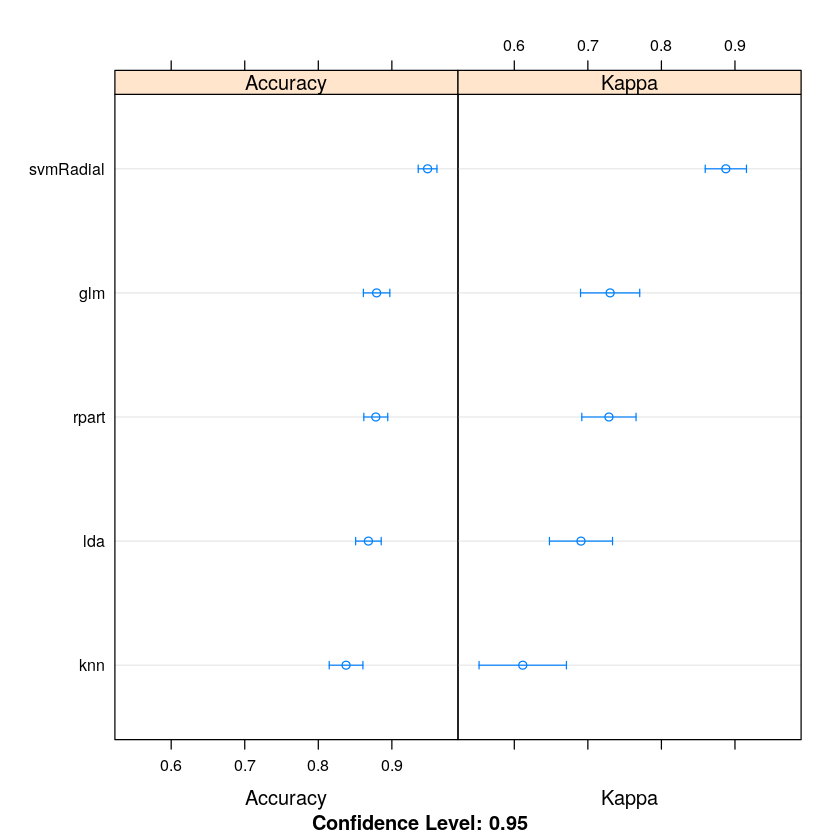

In [5]:
# create submodels
seed=10
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions=TRUE, classProbs=TRUE)
algorithmList <- c('lda', 'rpart', 'glm', 'knn', 'svmRadial')
set.seed(seed)
models <- caretList(Class~., data=dataset, trControl=control, methodList=algorithmList)
results <- resamples(models)
summary(results)
dotplot(results)

We can see that the SVM creates the most accurate model with an accuracy of 94.66%.

When we combine the predictions of different models using stacking, it is desirable that the predictions made by the sub-models have low correlation. This would suggest that the models are skillful but in different ways, allowing a new classifier to figure out how to get the best from each model for an improved score.

If the predictions for the sub-models were highly corrected (>0.75) then they would be making the same or very similar predictions most of the time reducing the benefit of combining the predictions.

,lda,rpart,glm,knn,svmRadial
lda,1.0000000,0.1626361,0.3417541,0.5493932,0.2399829
rpart,0.1626361,1.0000000,0.1043602,0.5249765,0.2941800
glm,0.3417541,0.1043602,1.0000000,0.1368957,0.2449965
knn,0.5493932,0.5249765,0.1368957,1.0000000,0.2828023
svmRadial,0.2399829,0.2941800,0.2449965,0.2828023,1.0000000


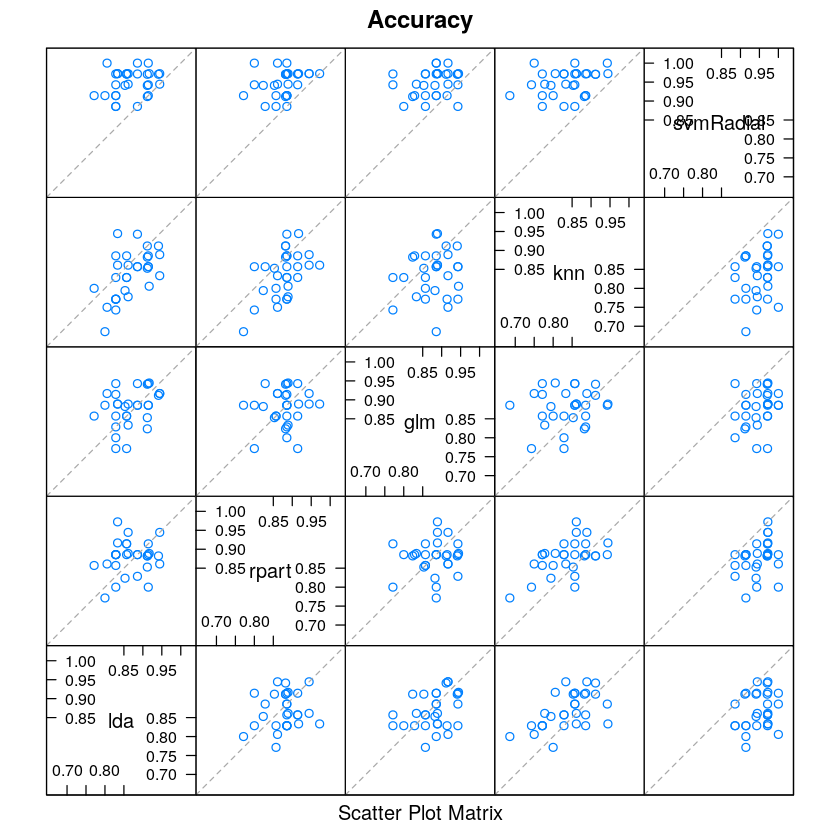

In [6]:
# correlation between results
modelCor(results)
splom(results)

We can see that all pairs of predictions have generally low correlation. The two methods with the highest correlation between their predictions are Logistic Regression (GLM) and kNN at 0.517 correlation which is not considered high (>0.75).

Let’s combine the predictions of the classifiers using a simple linear model.

In [ ]:
# stack using glm
stackControl <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions=TRUE, classProbs=TRUE)
set.seed(seed)
stack.glm <- caretStack(models, method="glm", metric="Accuracy", trControl=stackControl)
print(stack.glm)

We can see that we have lifted the accuracy to 94.99% which is a small improvement over using SVM alone. This is also an improvement over using random forest alone on the dataset, as observed above.

We can also use more sophisticated algorithms to combine predictions in an effort to tease out when best to use the different methods. In this case, we can use the random forest algorithm to combine the predictions.


In [ ]:
# stack using random forest
set.seed(seed)
stack.rf <- caretStack(models, method="rf", metric="Accuracy", trControl=stackControl)
print(stack.rf)

We can see that this has lifted the accuracy to 96.26% an impressive improvement on SVM alone.